In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import warnings
    
warnings.filterwarnings('ignore')

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

#### 决策树可视化展示

In [28]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

iris = load_iris()
# print(iris)
X = iris['data'][:, 2:]
y = iris['target']
# y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

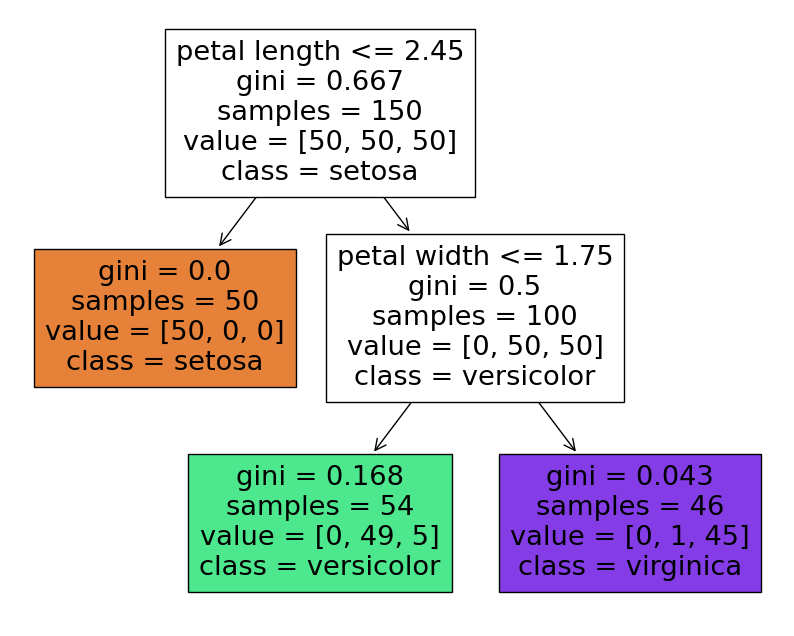

In [29]:
plt.figure(figsize=(10, 8))
plot_tree(tree_clf, 
          feature_names=["petal length", "petal width"], 
          class_names=iris['target_names'], 
          filled=True)
plt.show()

### 决策边界展示
- 棋盘

In [30]:
print(tree_clf.predict_proba([[5, 1.5]]), tree_clf.predict([[5, 1.5]]))

[[0.         0.90740741 0.09259259]] [1]


In [31]:
from matplotlib.colors import ListedColormap
from typing import List

def plot_decision_boundary(clf, X, y, axes: List, iris=True, plot_training=True, legend=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)

    X_test = np.c_[x1.ravel(), x2.ravel()]
    y_predict = clf.predict(X_test).reshape(x1.shape)

    custom_cmap = ListedColormap(['#b3b38f', '#a3a3c2', '#99cc99'])
    plt.contourf(x1, x2, y_predict, camp=custom_cmap)
    
    if not iris:
        custom_cmap_2 = ListedColormap(['#ffb3ba', '#ffdfba', '#d4b3ff'])
        plt.contour(x1, x2, y_predict, cmap=custom_cmap_2)
    
    if plot_training:
        plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'yo', label='Iris-Setosa')
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)

    if iris:
        plt.xlabel('Petal length', fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r'$x_1$', fontsize=14)
        plt.ylabel(r'$x_2$', fontsize=14, rotation=0)

    if legend:
        plt.legend()

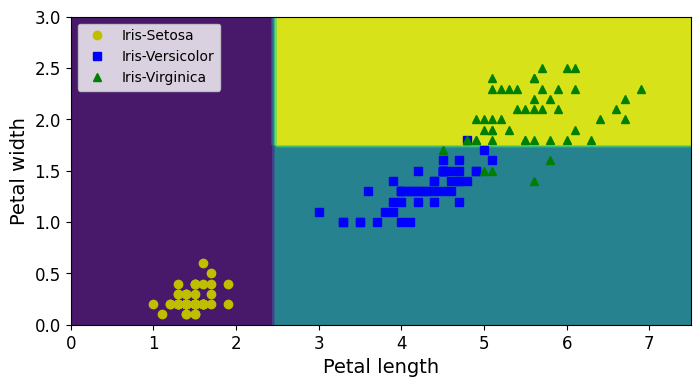

In [32]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y, axes=[0, 7.5, 0, 3])

### 决策树中的正则化
**DecisionTreeClassifier类**还有一些其他参数类似地限制了决策树的形状：
- `min_samples_split`节点在分割前必须具有的最小样本数
- `min_samples_leaf`叶子节点必须具有的最小样本数
- `max_leaf_nodes`叶子节点的最大数量
- `max_features`在每个节点处评估用于拆分的最大特征数
- `max_depth`树最大的深度

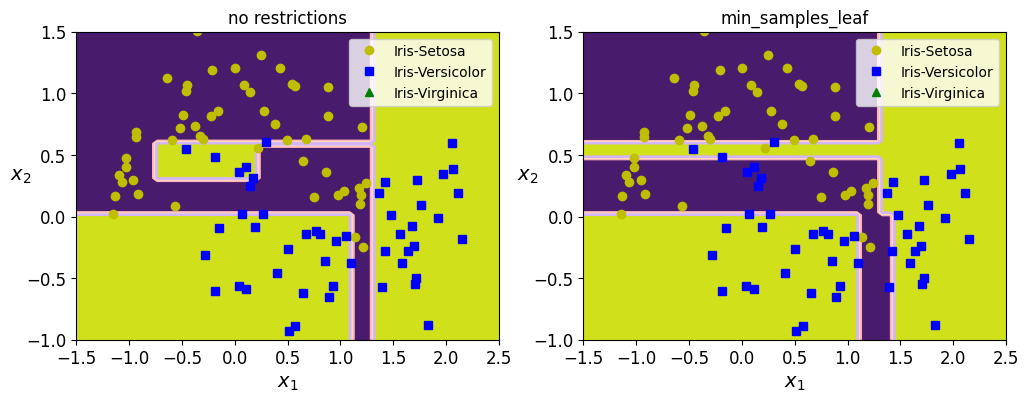

In [34]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=25)
tree_1 = DecisionTreeClassifier(random_state=17)
tree_1.fit(X, y)
tree_2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=17)
tree_2.fit(X, y)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_decision_boundary(tree_1, X, y, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title('no restrictions')
plt.subplot(122)
plot_decision_boundary(tree_2, X, y, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title('min_samples_leaf')

plt.show()

### 对数据的敏感
对数据形状很敏感，对于分类
- 生成随机数据点，并且对这些数据点进行旋转变换
- 旋转变换：用旋转矩阵

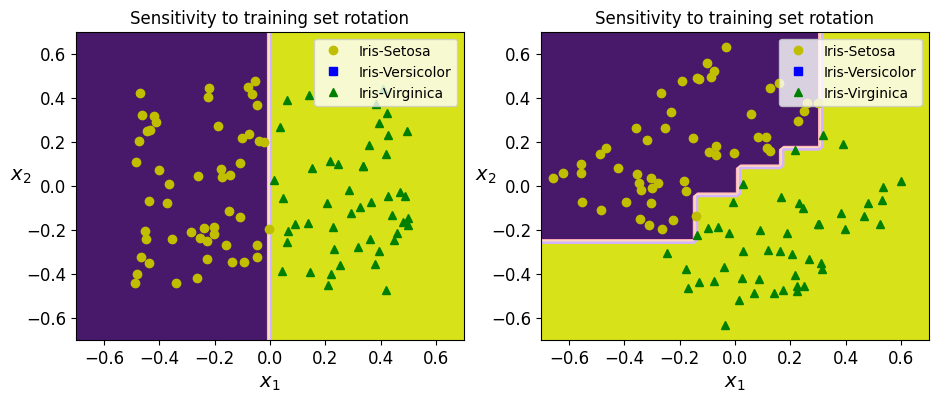

In [36]:
np.random.seed(77)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(float) * 2   # 只包含两个数

# 定义旋转矩阵
angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                           [np.sin(angle), np.cos(angle)]]
                          )
Xsr = np.dot(Xs, rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=7)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=7)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.title('Sensitivity to training set rotation')

plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.title('Sensitivity to training set rotation')

plt.show()

### 回归
- 评估标准改变（方差）

In [37]:
np.random.seed(77)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [40]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)


DecisionTreeRegressor(max_depth=2)

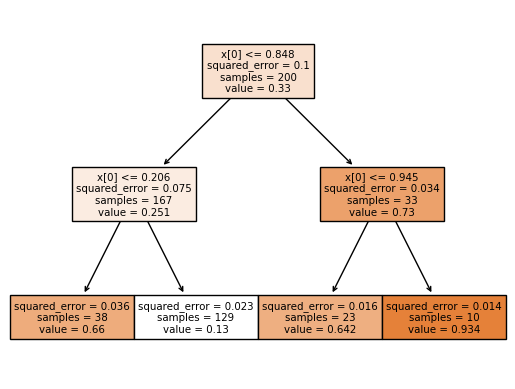

In [42]:
plot_tree(tree_reg, filled=True)
plt.show()

### 对比决策树深度对结果的影响

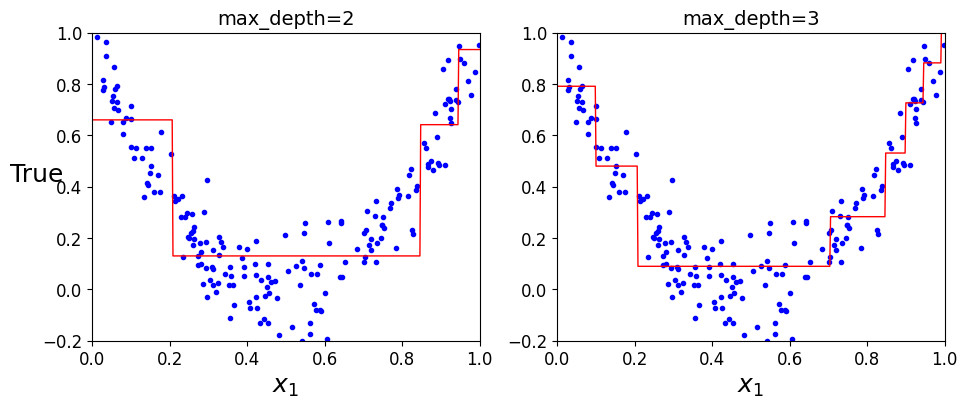

In [44]:
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel=True):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel('$x_1$', fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, 'b.')
    plt.plot(x1, y_pred, 'r-', linewidth=1, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
plt.title("max_depth=3", fontsize=14)

plt.show()

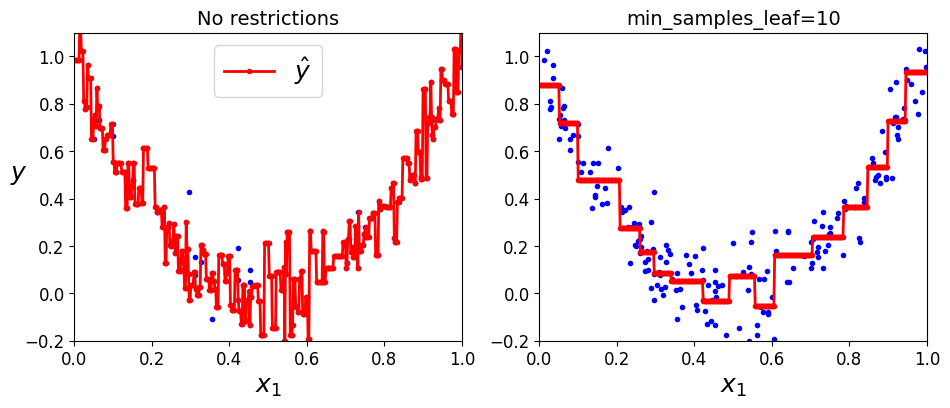

In [45]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()